# 1. 라이브러리 및 데이터 불러오기

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd

In [4]:
data=pd.read_csv("/content/drive/MyDrive/G_ML_2/data/wine.csv",sep=',')

In [5]:
X=data[data.columns[0:11]]

In [6]:
y=data[['quality']]

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size = 0.7, random_state=42)

# 2. Grid Search

In [9]:
from sklearn.model_selection import GridSearchCV

In [10]:
param_grid={'alpha': [0.0, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 0.1, 0.5, 1.0, 2.0, 3.0]}

In [11]:
from sklearn.linear_model import Lasso

In [12]:
grid_search=GridSearchCV(Lasso(), param_grid, cv=5, return_train_score=True)

In [13]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1,
                                   0.5, 1.0, 2.0, 3.0]},
             return_train_score=True)

In [14]:
print("Best Parameter: {}".format(grid_search.best_params_))

Best Parameter: {'alpha': 0.0001}


In [15]:
print("Best Cross-validity Score: {:.3f}".format(grid_search.best_score_))

Best Cross-validity Score: 0.335


In [16]:
print("Test set Score: {:.3f}".format(grid_search.score(X_test, y_test)))

Test set Score: 0.351


In [17]:
result_grid= pd.DataFrame(grid_search.cv_results_)

In [18]:
result_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.023263,0.005720,0.006365,0.002308,0,{'alpha': 0.0},0.364330,0.202185,0.349339,0.306427,0.452648,0.334986,0.081686,4,0.356033,0.394013,0.361167,0.368515,0.338667,0.363679,0.018077
1,0.019536,0.002346,0.010135,0.000155,1e-06,{'alpha': 1e-06},0.364457,0.202109,0.349436,0.306734,0.452626,0.335072,0.081696,3,0.356030,0.394010,0.361164,0.368512,0.338664,0.363676,0.018077
2,0.009705,0.004103,0.006571,0.002382,1e-05,{'alpha': 1e-05},0.365364,0.201697,0.350087,0.306793,0.452368,0.335262,0.081841,2,0.355755,0.393928,0.360905,0.368509,0.338519,0.363523,0.018120
3,0.007637,0.003348,0.005570,0.001213,0.0001,{'alpha': 0.0001},0.365507,0.202216,0.350254,0.306059,0.452874,0.335382,0.081885,1,0.355486,0.393914,0.360738,0.368495,0.338506,0.363428,0.018147
4,0.008533,0.003912,0.006685,0.002593,0.001,{'alpha': 0.001},0.362459,0.206064,0.349046,0.297689,0.456747,0.334401,0.082205,5,0.353930,0.392519,0.359211,0.367151,0.337159,0.361994,0.018154
5,0.011764,0.010838,0.005197,0.000570,0.01,{'alpha': 0.01},0.329622,0.226937,0.338052,0.293248,0.447682,0.327108,0.071896,6,0.336096,0.372458,0.341919,0.351517,0.315806,0.343559,0.018586
6,0.008071,0.002829,0.005243,0.001066,0.1,{'alpha': 0.1},0.205378,0.205979,0.271721,0.191303,0.325728,0.240022,0.051153,7,0.251971,0.263536,0.244128,0.259255,0.223622,0.248502,0.014084
7,0.009159,0.006305,0.005136,0.001050,0.5,{'alpha': 0.5},0.039654,0.054970,0.043757,0.001547,0.044006,0.036787,0.018338,8,0.039522,0.037958,0.036981,0.055022,0.041041,0.042105,0.006605
8,0.009556,0.004758,0.005600,0.001805,1,{'alpha': 1.0},0.037447,0.050191,0.040805,0.004923,0.041501,0.034973,0.015603,9,0.038017,0.035392,0.035955,0.049093,0.038706,0.039433,0.004986
9,0.010980,0.003289,0.006183,0.001998,2,{'alpha': 2.0},0.031793,0.042067,0.033149,0.011150,0.037160,0.031064,0.010580,10,0.033585,0.031436,0.031851,0.044763,0.034610,0.035249,0.004894


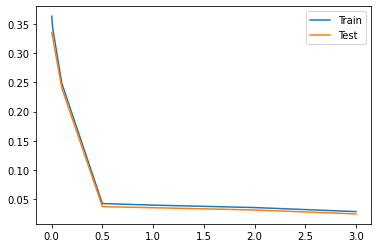

In [19]:
import matplotlib.pyplot as plt
plt.plot(result_grid['param_alpha'],  result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_alpha'],  result_grid['mean_test_score'], label="Test")
plt.legend()

# 3. Random Search

In [20]:
from sklearn.model_selection import RandomizedSearchCV

In [21]:
from scipy.stats import randint

In [22]:
param_distribs = {'alpha': randint(low=0.00001, high=10)}

In [31]:
random_search=RandomizedSearchCV(Lasso(), param_distributions=param_distribs, 
                                 cv=5,  n_iter=1000, return_train_score=True)

In [32]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=Lasso(), n_iter=1000,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f1fcb8f5c90>},
                   return_train_score=True)

In [33]:
print("Best Parameter: {}".format(random_search.best_params_))

Best Parameter: {'alpha': 0}


In [34]:
print("Best Cross-validity Score: {:.3f}".format(random_search.best_score_))

Best Cross-validity Score: 0.335


In [35]:
print("Test set Score: {:.3f}".format(random_search.score(X_test, y_test)))

Test set Score: 0.351


In [36]:
result_random= pd.DataFrame(random_search.cv_results_ )

In [37]:
result_random

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010232,0.004476,0.005611,0.002210,2,{'alpha': 2},0.031793,0.042067,0.033149,0.011150,0.037160,0.031064,0.010580,200,0.033585,0.031436,0.031851,0.044763,0.034610,0.035249,0.004894
1,0.007228,0.001564,0.004747,0.000128,5,{'alpha': 5},-0.001760,0.003656,-0.003839,0.007682,0.006175,0.002383,0.004471,484,0.002557,0.003750,0.003122,0.014448,0.005937,0.005963,0.004395
2,0.029789,0.008229,0.008182,0.002283,0,{'alpha': 0},0.364330,0.202185,0.349339,0.306427,0.452648,0.334986,0.081686,1,0.356033,0.394013,0.361167,0.368515,0.338667,0.363679,0.018077
3,0.014450,0.002198,0.009519,0.000338,8,{'alpha': 8},-0.004409,-0.000948,-0.007433,-0.000005,-0.000272,-0.002613,0.002881,594,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.016569,0.005656,0.007339,0.002792,4,{'alpha': 4},0.012189,0.018799,0.010826,0.012529,0.019497,0.014768,0.003628,396,0.015854,0.015615,0.015434,0.027440,0.018226,0.018514,0.004576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.010938,0.004500,0.007361,0.002292,7,{'alpha': 7},-0.004409,-0.000948,-0.007433,-0.000005,-0.000272,-0.002613,0.002881,594,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
996,0.014104,0.000813,0.007760,0.002703,5,{'alpha': 5},-0.001760,0.003656,-0.003839,0.007682,0.006175,0.002383,0.004471,484,0.002557,0.003750,0.003122,0.014448,0.005937,0.005963,0.004395
997,0.006881,0.002494,0.005381,0.001775,5,{'alpha': 5},-0.001760,0.003656,-0.003839,0.007682,0.006175,0.002383,0.004471,484,0.002557,0.003750,0.003122,0.014448,0.005937,0.005963,0.004395
998,0.008100,0.003526,0.005716,0.001758,1,{'alpha': 1},0.037447,0.050191,0.040805,0.004923,0.041501,0.034973,0.015603,95,0.038017,0.035392,0.035955,0.049093,0.038706,0.039433,0.004986


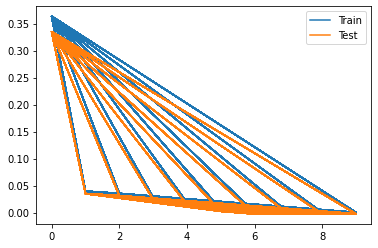

In [38]:
import matplotlib.pyplot as plt
plt.plot(result_random['param_alpha'], result_random['mean_train_score'], label="Train")
plt.plot(result_random['param_alpha'], result_random['mean_test_score'], label="Test")
plt.legend()